# import Liberaries

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from skimage.io import imread_collection
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from skimage import  io
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
from sklearn import metrics
from sklearn.metrics import f1_score


In [2]:
!pip install imbalanced-learn

# Function to evaluate

In [3]:
def model_Evaluate(y_test,y_pred):
    # Print the evaluation metrics for the dataset.
    f1=f1_score(y_test, y_pred, average='weighted')
    print("f1_score:",f1)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return f1

# read images



In [4]:
def readimgs(path):
    file = os.listdir(path)
    files = []
    for img in file:
        fullPath = os.path.join(path, img)
        if os.path.isdir(fullPath):
            files = files + readimgs(fullPath)
        else:
            files.append(fullPath)              
    return files        


In [5]:
path=r'textures\training'
imgs = readimgs(path)
imgs = [io.imread(file) for file in imgs]

In [6]:
path=r'textures\testing'
imgs_test = readimgs(path)
imgs_test = [io.imread(file) for file in imgs_test]

# Resize the images


In [7]:
new_img=[]
for i in range(len(imgs)):
    new_img.append(resize(imgs[i], (32, 32),anti_aliasing=True).flatten())

In [8]:
print("number of training images : ",len(new_img))

number of training images :  180


In [9]:
new_img_test=[]
for i in range(len(imgs_test)):
    new_img_test.append(resize(imgs_test[i], (32, 32),anti_aliasing=True).flatten())

In [10]:
print("number of testing images : ",len(new_img_test))

number of testing images :  60


# show images

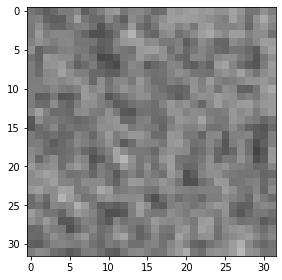

In [11]:
def show(img):
    io.imshow(img.reshape(32,32))
    plt.show()
    
show(new_img[150])

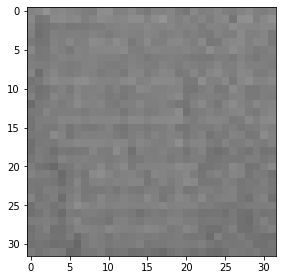

In [12]:
show(new_img_test[40])

# labeled the images

In [13]:
#fiels' name
label=["canvas1", "cushion1", "linsseeds1", "sand1","seat2","stone1"]

In [14]:
# labeld each image with the file name
c=[]
x=0
for j in label:
    for i in range(0+x,30+x):
        c.append(j)
    x=x+30

In [15]:
t=[]
x=0
for j in label:
    for i in range(0+x,10+x):
        t.append(j)
    x=x+10

# Match the images


In [16]:
#################### train data ########################
imageA=[]
imageB=[]
label=[]
for i in range(len(new_img)-1):
    for j in range(i+1,len(new_img)):
        # save the images in list
        imageA.append(new_img[i])
        imageB.append(new_img[j])
        #if the 2 images have same class. labeled them as 1 if not 0
        if(c[i]==c[j]):
            label.append(1)
        else:
            label.append(0)

In [17]:
print("number of images :",len(imageA))

number of images : 16110


In [18]:
#################### test data ########################

imageA_test=[]
imageB_test=[]
label_test=[]
for i in range(len(new_img_test)-1):
    for j in range(i+1,len(new_img_test)):
        imageA_test.append(new_img_test[i])
        imageB_test.append(new_img_test[j])
        if(t[i]==t[j]):
            label_test.append(1)
        else:
            label_test.append(0)

In [19]:
print("number of images :",len(imageA_test))

number of images : 1770


# concatenate 2 images

In [20]:
#################### train data ########################

concat=[]
for i in range(len(imageA)):
    concat.append(np.concatenate((imageA[i], imageB[i]), axis=0))

In [21]:
#################### test data ########################
concat_test=[]
for i in range(len(imageA_test)):
    concat_test.append(np.concatenate((imageA_test[i], imageB_test[i]), axis=0))

# operations

In [22]:
def conv(imageA, imageB):
    imageA=np.flip(imageA, (0))
    mul = np.multiply(imageA,imageB)
    score= sum(mul)
    return score

In [23]:
def cc(imageA, imageB):
    mul = np.multiply(imageA,imageB)
    score= sum(mul)
    return score

In [24]:
def ssd(imageA,imageB):
    score = np.sum((np.array(imageA, dtype=np.float32) - np.array(imageB, dtype=np.float32))**2)
    return score
    

# function matching Images


In [25]:
def matchingImages( imageA, imageB, method, normalize):
    if normalize=='y':
        imageA = imageA- np.mean(imageA)/ np.std(imageA)
        imageB = imageB- np.mean(imageB)/ np.std(imageB)
        
    if method == 'cc' :
       result=cc(imageA,imageB)

    elif method == 'conv':
        result=conv(imageA,imageB)

    elif method == 'ssd':
        #result = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
        result=ssd(imageA,imageB)
    return result

In [26]:
df_train=pd.DataFrame({'imageA':imageA,'imageB':imageB,'concat':concat,'class':label})

In [27]:
df_train.head()

,imageA,imageB,concat,class
0,"[0.49607843137254903, 0.5019607843137255, 0.45...","[0.4, 0.4215686274509806, 0.4382352941176472, ...","[0.49607843137254903, 0.5019607843137255, 0.45...",1
1,"[0.49607843137254903, 0.5019607843137255, 0.45...","[0.4872549019607842, 0.48627450980392156, 0.44...","[0.49607843137254903, 0.5019607843137255, 0.45...",1
2,"[0.49607843137254903, 0.5019607843137255, 0.45...","[0.5617647058823528, 0.5343137254901961, 0.456...","[0.49607843137254903, 0.5019607843137255, 0.45...",1
3,"[0.49607843137254903, 0.5019607843137255, 0.45...","[0.45294117647058824, 0.4647058823529412, 0.47...","[0.49607843137254903, 0.5019607843137255, 0.45...",1
4,"[0.49607843137254903, 0.5019607843137255, 0.45...","[0.519607843137255, 0.4784313725490196, 0.4862...","[0.49607843137254903, 0.5019607843137255, 0.45...",1


In [28]:
df_train['class'].value_counts()

0    13500
1     2610
Name: class, dtype: int64

# split train and validition

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [58]:
X, y= rus.fit_resample(concat, label)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True, stratify=y)

In [32]:
print('***** train data *****')
print("class 0 :",np.shape(np.array(y_train)[np.array(y_train) == 0])[0])
print("class 1 :",np.shape(np.array(y_train)[np.array(y_train) == 1])[0])
print('the size of train data : ',len(X_train))

***** train data *****
class 0 : 1827
class 1 : 1827
the size of train data :  3654


In [33]:
print('***** valid data *****')
print("class 0 :",np.shape(np.array(y_valid)[np.array(y_valid) == 0])[0])
print("class 1 :",np.shape(np.array(y_valid)[np.array(y_valid) == 1])[0])
print('the size of valid data : ',len(X_valid))

***** valid data *****
class 0 : 783
class 1 : 783
the size of valid data :  1566


# build the classifiers

In [34]:
def sep (conc):
    middle_index=len(conc[0])// 2
    imageA=[]
    imageB=[]
    for i in conc:
        imageA.append(i[:middle_index]) 
        imageB.append(i[middle_index:])
    return imageA , imageB

In [35]:
def  operations(imageA , imageB ,method ,norm):
    result=[]
    for i in range(len(imageA)): 
        result.append(matchingImages( imageA[i], imageB[i], method,norm))
    return result

In [36]:
def report(X_train,X_valid,method ,norm):
    imageA_train , imageB_train= sep (X_train)
    train=operations(imageA_train , imageB_train,method ,norm)
    threshold=np.mean(train)

    imageA_valid , imageB_valid = sep (X_valid)
    valid=operations(imageA_valid , imageB_valid,method ,norm)
    if method != 'ssd':
        for i in range(len(valid)):
            if  valid[i]<threshold:
                  valid[i]=0  
            else :
                 valid[i]=1
    else :
        for i in range(len(valid)):
            if  valid[i]>threshold:
                  valid[i]=0  
            else :
                 valid[i]=1
        
    return valid                   

In [37]:
methods=['cc','conv','ssd']
normaliztion =['y','n']
classifiers=[]
f1=[]
for method in methods :
    for norm in normaliztion:
        classifiers.append(method+"_"+norm)
        print('#######################',method,"_",norm,'#######################')
        predict=report(X_train,X_valid,method ,norm)
        f1.append(model_Evaluate(y_valid,predict))

####################### cc _ y #######################
f1_score: 0.4732531328152198
Accuracy: 0.4891443167305236
              precision    recall  f1-score   support

           0       0.49      0.66      0.56       783
           1       0.48      0.32      0.38       783

    accuracy                           0.49      1566
   macro avg       0.49      0.49      0.47      1566
weighted avg       0.49      0.49      0.47      1566

####################### cc _ n #######################
f1_score: 0.5523479218276905
Accuracy: 0.5523627075351213
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       783
           1       0.55      0.56      0.55       783

    accuracy                           0.55      1566
   macro avg       0.55      0.55      0.55      1566
weighted avg       0.55      0.55      0.55      1566

####################### conv _ y #######################
f1_score: 0.4732531328152198
Accuracy: 0.4891443167305236
     

# the best classifier according to f1_score 

In [38]:
best=np.argmax(f1)
print('the best classifier',classifiers[best]," with f1 score :",f1[best])

the best classifier ssd_y  with f1 score : 0.7165563656905749


# build MLP

In [39]:
from sklearn.neural_network import MLPClassifier
import warnings

nn_clf =   MLPClassifier(max_iter=1,warm_start='true',solver='sgd')
nn_clf.fit(X_train,y_train)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1, solver='sgd', warm_start='true')

In [40]:
pred_train=nn_clf.predict(X_train)

In [41]:
model_Evaluate(y_train,pred_train)

f1_score: 0.40397625068432447
Accuracy: 0.5068418171866448
              precision    recall  f1-score   support

           0       0.54      0.09      0.16      1827
           1       0.50      0.92      0.65      1827

    accuracy                           0.51      3654
   macro avg       0.52      0.51      0.40      3654
weighted avg       0.52      0.51      0.40      3654



0.40397625068432447

The model didn't train well on the data train ..it suffers from underfitting .. i increase  the complexty 

In [42]:
import time
timee=time.time()
nn_clf =   MLPClassifier(max_iter=100)
nn_clf.fit(X_train,y_train)
timee=time.time()-timee
print(timee)

34.52503943443298


C:\Users\Dina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
pred_train=nn_clf.predict(X_train)

In [44]:
model_Evaluate(y_train,pred_train)

f1_score: 0.8131623146000366
Accuracy: 0.8139025725232621
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1827
           1       0.86      0.75      0.80      1827

    accuracy                           0.81      3654
   macro avg       0.82      0.81      0.81      3654
weighted avg       0.82      0.81      0.81      3654



0.8131623146000366

The model didn't train very well. but it's fine

In [45]:
pred=nn_clf.predict(X_valid)

In [46]:
model_Evaluate(y_valid,pred)

f1_score: 0.7581268485047651
Accuracy: 0.7598978288633461
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       783
           1       0.81      0.67      0.74       783

    accuracy                           0.76      1566
   macro avg       0.77      0.76      0.76      1566
weighted avg       0.77      0.76      0.76      1566



0.7581268485047651

# Comparison

In [47]:
timee=time.time()
pred_mlp=nn_clf.predict(concat_test)
timee=time.time()-timee
print(timee)

0.032913923263549805


MLP is faster it predict the test in (0.03) s  

In [48]:
model_Evaluate(label_test,pred_mlp)

f1_score: 0.6066318617093017
Accuracy: 0.5423728813559322
              precision    recall  f1-score   support

           0       0.85      0.56      0.68      1500
           1       0.15      0.43      0.22       270

    accuracy                           0.54      1770
   macro avg       0.50      0.50      0.45      1770
weighted avg       0.74      0.54      0.61      1770



0.6066318617093017

No efforts in the train but it took 34 s because it build on 100 interations 

regarding to test report : it get 0.68 f1-score for class 0 and 0.22 for class 1. that mean it can't classfy it. so, i don't think that it is generalized. the f1_score decrease each time the model see the unseen data.

Robustness : the model has a ratio of error with train data , increased in the validation and be high with the test data.

In [62]:
timee=time.time()
pred_classifier=report(X_train,concat_test,'ssd' ,'y')
timee=time.time()-timee
print(timee)

3.1421494483947754


it took (3)s to predict the test   

In [50]:
model_Evaluate(label_test,pred_classifier)

f1_score: 0.5741469934092844
Accuracy: 0.5214689265536723
              precision    recall  f1-score   support

           0       0.99      0.44      0.61      1500
           1       0.24      0.99      0.39       270

    accuracy                           0.52      1770
   macro avg       0.62      0.71      0.50      1770
weighted avg       0.88      0.52      0.57      1770



0.5741469934092844

No efforts in the train but the training . but the threashold depends on my decision to choose the best approach.

regarding to test report : it get 0.61 f1-score for class 0 and 0.39 for class 1. that mean it can't classfy it. so, i don't think that it is generalized. the f1_score decrease each time the model see the unseen data.

Robustness : the model has a ratio of error with train data , increased in the validation and be high with the test data.

# Feature Engineering

In [51]:
import skimage
from skimage import filters
X_train_filtered = skimage.filters.gaussian(np.asarray( X_train))
X_test_filtered = skimage.filters.gaussian(np.asarray( concat_test))
X_valid= skimage.filters.gaussian(np.asarray( X_valid))

In [52]:
X_train_filtered = skimage.filters.sobel(np.asarray( X_train))
X_test_filtered = skimage.filters.sobel(np.asarray( concat_test))
X_valid= skimage.filters.sobel(np.asarray( X_valid))

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
pca = pca.fit(X_train_filtered)
X_train_filtered_scaled=pca.transform(X_train_filtered)
X_test_filtered_scaled=pca.transform(X_test_filtered)
X_valid=pca.transform(X_valid)

In [54]:
nn_clf2 =   MLPClassifier(max_iter=100)
nn_clf2.fit(X_train_filtered_scaled,y_train)

C:\Users\Dina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [55]:
pred=nn_clf2.predict(X_test_filtered_scaled)
model_Evaluate(label_test,pred)

f1_score: 0.7716265815230364
Accuracy: 0.7389830508474576
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1500
           1       0.34      0.72      0.46       270

    accuracy                           0.74      1770
   macro avg       0.64      0.73      0.64      1770
weighted avg       0.85      0.74      0.77      1770



0.7716265815230364

first : i need to remove noise and detail so i used Gaussian filter 


second : i need to make fillter to make edge detection so i used Sobel filter 

this appoach make the f1_score: 0.77  instead of 0.60